# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [87]:
%pip install --upgrade plotly

## Import Statements

In [88]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [89]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [90]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [91]:
dataframes = {
    'Household Income': df_hh_income,
    'Poverty Percentage': df_pct_poverty,
    'High School Completion': df_pct_completed_hs,
    'Race by City': df_share_race_city,
    'Police Fatalities': df_fatalities
}

In [92]:
def display_dataframes_info(dataframes_dict):
    """Display multiple dataframes detailed information in a good looking table"""
    print("\n📋 DATAFRAMES DETAILED INFORMATION")
    print("=" * 80)

    # Header
    print(f"{'DataFrame':<35} {'Rows':<8} {'Columns':<6} {'NaN':<8} {'Duplicates':<12}")
    print("-" * 80)

    # Data rows
    for name, df in dataframes_dict.items():
        nan_count = df.isnull().sum().sum()
        dup_count = df.duplicated().sum()
        print(f"{name:<35} {df.shape[0]:<8} {df.shape[1]:<6} {nan_count:<8} {dup_count:<12}")

display_dataframes_info(dataframes)


📋 DATAFRAMES DETAILED INFORMATION
DataFrame                           Rows     Columns NaN      Duplicates  
--------------------------------------------------------------------------------
Household Income                    29322    3      51       0           
Poverty Percentage                  29329    3      0        0           
High School Completion              29329    3      0        0           
Race by City                        29268    7      0        0           
Police Fatalities                   2535     14     346      0           


In [93]:
def display_columns_info(dataframes_dict):
    """Display multiple dataframes column names"""
    print("\n📝 COLUMNS PER DATAFRAME")
    print("=" * 50)

    for name, df in dataframes_dict.items():
        print(f"\n🔹 {name}:")
        print(f"   Columns ({len(df.columns)}): {list(df.columns)}")

display_columns_info(dataframes)


📝 COLUMNS PER DATAFRAME

🔹 Household Income:
   Columns (3): ['Geographic Area', 'City', 'Median Income']

🔹 Poverty Percentage:
   Columns (3): ['Geographic Area', 'City', 'poverty_rate']

🔹 High School Completion:
   Columns (3): ['Geographic Area', 'City', 'percent_completed_hs']

🔹 Race by City:
   Columns (7): ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

🔹 Police Fatalities:
   Columns (14): ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [94]:
df_with_na = df_hh_income[df_hh_income.isna().any(axis=1)]
df_with_na.head()
# Only WY Area has 51 columns with NaN, I'll substitute them with '0' to keep data for that area.

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN


In [95]:
df_hh_income_clean = df_hh_income.fillna(0)
df_hh_income_clean.tail()

,Geographic Area,City,Median Income
29317,WY,Woods Landing-Jelm CDP,0
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500
29321,WY,Y-O Ranch CDP,0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [96]:
# Convert DF data types
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [97]:
# Group by Geographic Area
poverty_rate_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

# Sort by poverty_rate
poverty_rate_by_state = poverty_rate_by_state.sort_values(by='poverty_rate', ascending=False)
poverty_rate_by_state.head()

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96


In [98]:
# Ready to plot
fig1 = px.bar(poverty_rate_by_state,
               x='Geographic Area',
               y='poverty_rate',
               color = 'poverty_rate',
               color_continuous_scale='Agsunset_r',
               #color_discrete_sequence=['#54A24B']  # One single color
               )

fig1.update_layout(title='Poverty Rate by US State',
                    xaxis_title='Poverty Rate (%)',
                    yaxis_title='US State',
                   )

fig1.update_coloraxes(colorbar_title="Poverty Rate (%)")

fig1.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [99]:
# Convert DF data types
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29132 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [100]:
# Group by Geographic Area
completed_hs_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

# Sort by poverty_rate
completed_hs_by_state = completed_hs_by_state.sort_values(by='percent_completed_hs', ascending=False)
completed_hs_by_state.head()

,Geographic Area,percent_completed_hs
19,MA,92.40
50,WY,92.10
11,HI,91.67
44,UT,91.62
6,CT,91.59


In [101]:
# Ready to plot
fig1 = px.bar(completed_hs_by_state,
               x='Geographic Area',
               y='percent_completed_hs',
               color = 'percent_completed_hs',
               color_continuous_scale='Aggrnyl',
               #color_discrete_sequence=['#54A24B']  # One single color
               )

fig1.update_layout(title='Percentege of people that has completed High School by US State',
                    xaxis_title='Percentage of completed High School (%)',
                    yaxis_title='US State',
                   )

fig1.update_coloraxes(colorbar_title="Percentage (%)")

fig1.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [102]:
df_merged_by_state = pd.merge(completed_hs_by_state, poverty_rate_by_state, on='Geographic Area')
df_merged_by_state.head()

,Geographic Area,percent_completed_hs,poverty_rate
0,MA,92.40,9.59
1,WY,92.10,9.89
2,HI,91.67,13.40
3,UT,91.62,11.98
4,CT,91.59,9.14


In [103]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_merged_by_state['Geographic Area'],
               y=df_merged_by_state['percent_completed_hs'],
               name="Percentage completed High School",
               line=dict(color='#54A24B'),
               ),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_merged_by_state['Geographic Area'],
               y=df_merged_by_state['poverty_rate'],
               name="Poverty Rate",
               line=dict(color='#FF4136'),
               ),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="<b>Relationship between Poverty Rates and High School Graduation Rates</b>"
)

# Set x-axis title
fig.update_xaxes(title_text="US State")

# Set y-axes titles
fig.update_yaxes(title_text="Percentage of people completed High School", secondary_y=False)
fig.update_yaxes(title_text="Poverty Rate", secondary_y=True)

fig.show()

print("There appears to be a reversed correlation between people completed High School and Poverty Rate in US States.\n There are some exceptions, but there is a clear trend showing that higher graduation rates tend to have a lower poverty rate.")

There appears to be a reversed correlation between people completed High School and Poverty Rate in US States.
 There are some exceptions, but there is a clear trend showing that higher graduation rates tend to have a lower poverty rate.


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

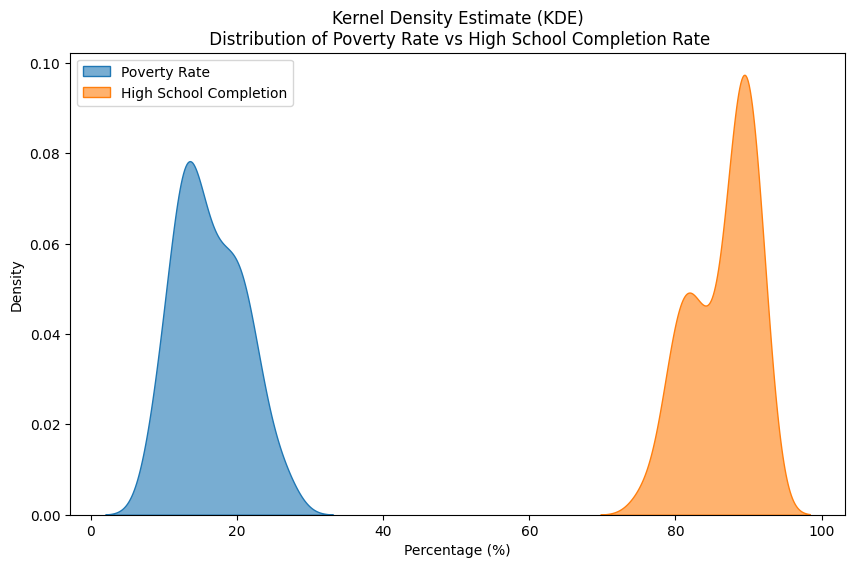

In general, graduations percentage is held above 60% and poverty rate, below 40%.


In [104]:
# Create plot with both distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_merged_by_state, x="poverty_rate", label="Poverty Rate", fill=True, alpha=0.6)
sns.kdeplot(data=df_merged_by_state, x="percent_completed_hs", label="High School Completion", fill=True, alpha=0.6)

plt.title("Kernel Density Estimate (KDE)\n Distribution of Poverty Rate vs High School Completion Rate")
plt.xlabel("Percentage (%)")
plt.ylabel("Density")
plt.legend()
plt.show()

print("In general, graduations percentage is held above 60% and poverty rate, below 40%.")

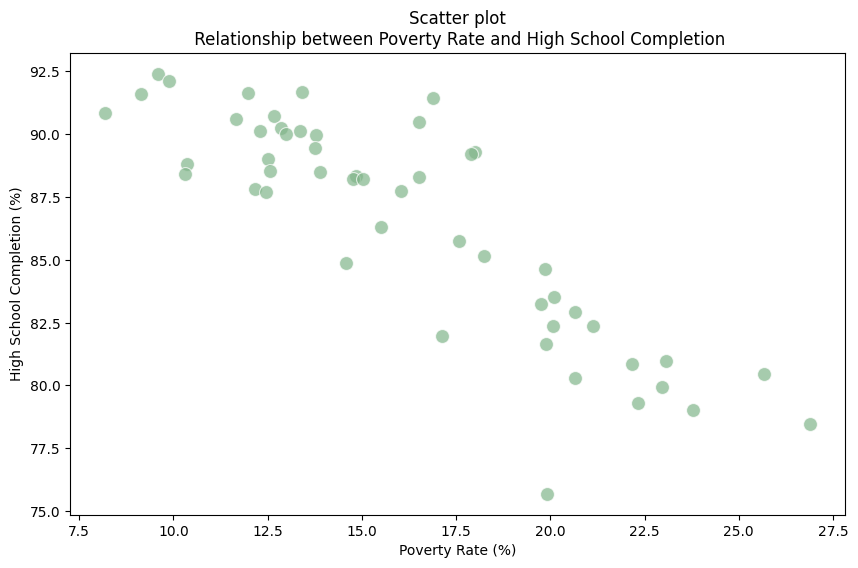

We can see a better correlation here. I could say there is a linear correlation.


In [105]:
# Scatterplot to see relationship between both variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_by_state,
                x="poverty_rate",
                y="percent_completed_hs",
                color='#81B58A',
                s=100, alpha=0.7)

plt.title("Scatter plot\n Relationship between Poverty Rate and High School Completion")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Completion (%)")
plt.show()

print("We can see a better correlation here. I could say there is a linear correlation.")

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

<Figure size 1000x600 with 0 Axes>

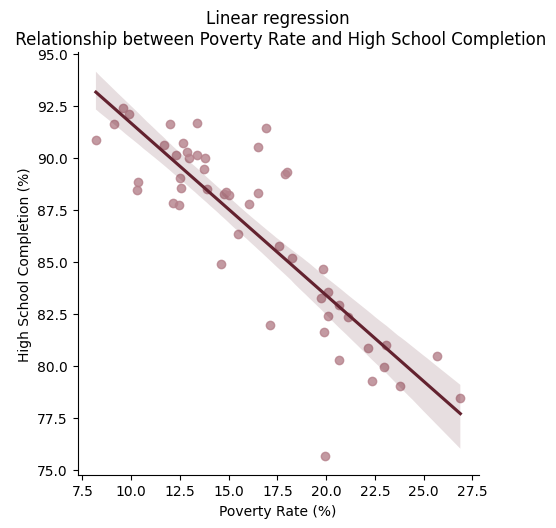

Linear regression seems to be a good fit.


In [106]:
# Linear regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=df_merged_by_state,
           x="poverty_rate",
           y="percent_completed_hs",
           line_kws={'color':'#63222F'},
           scatter_kws={'color':'#B5818B'}
           )

plt.title("Linear regression\n Relationship between Poverty Rate and High School Completion")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Completion (%)")
plt.show()

print("Linear regression seems to be a good fit.")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [107]:
# Convert DF data types
columns_not_to_convert = ['Geographic area', 'City']
share_races_list = [col for col in df_share_race_city.columns if col not in columns_not_to_convert]

for col in share_races_list:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [108]:
# Group by Geographic Area
share_race_by_state = df_share_race_city.groupby('Geographic area')[share_races_list].mean().reset_index()

share_race_by_state.head()

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65


In [109]:
""" Ready to plot normalizing percentaged
(I realized 2 columns added up to more that 120% and another one was way below.
All other looked decent. These was likely because the differences in the
percentages among the cities on those states were greater.)"""

def create_normalized_stacked_bar(df):
    """Normalices the percentages so thay they add up to 100%"""

    # Calculate totals
    df_normalized = df.copy()
    totals = df_normalized[share_races_list].sum(axis=1)

    # Normalize each category
    for cat in share_races_list:
        df_normalized[cat] = (df_normalized[cat] / totals) * 100

    # Create plot with normalized data
    fig = go.Figure()

    colors = ['#75BD89', '#98BD75', '#BD75A0', '#3D2A35', '#2A3D2F']
    names = ['White', 'Black', 'Native American', 'Asian', 'Hispanic']

    for i, (cat, name) in enumerate(zip(share_races_list, names)):
        fig.add_trace(go.Bar(
            x=df_normalized['Geographic area'],
            y=df_normalized[cat],
            name=name,
            marker_color=colors[i]
        ))

    fig.update_layout(
        barmode='stack',
        title='Race Share by US State (Normalized to 100%)',
        xaxis_title='US State',
        yaxis_title='Percentage (%)',
        xaxis={'categoryorder': 'category ascending'},
        height=600,
        width=1200,
        annotations=[
            dict(text="*Normalized data to add up to 100%",
                 xref="paper", yref="paper",
                 x=0, y=-0.1, showarrow=False)
        ]
    )

    return fig

fig = create_normalized_stacked_bar(share_race_by_state)
fig.show()


# Create Donut Chart of People Killed by Race

Hint: Use `.value_counts()`

In [110]:
# Replace NaN values on 'race' column with 'other'
df_fatalities['race'].isna().any()
df_fatalities['race'] = df_fatalities['race'].replace(np.nan, 'O')
# .fillna('no data') works too
df_fatalities.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,O,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,O,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,O,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [111]:
killed_by_race = df_fatalities['race'].value_counts()
race_mapping = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'O': 'Other',
    'A': 'Asian',
    'N': 'Native American'
}
# # Add a column and map the race_mapping, the name of the race is easier to read, than the initials.
killed_by_race.index = killed_by_race.index.map(race_mapping)
killed_by_race


,count
race,
White,1201
Black,618
Hispanic,423
Other,223
Asian,39
Native American,31


In [112]:
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=killed_by_race.index,
                             values=killed_by_race.values,
                             hole=.3,
                             textinfo='label+percent',
                             textfont_size=14,
                             )])
fig.update_layout(
        title='People killed by race in the US',
        height=600,
        width=1200,
    )

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [113]:
killed_by_gender = df_fatalities['gender'].value_counts()
gender_mapping = {
    'F': 'Female',
    'M': 'Male',
}
# # Add a column and map the race_mapping, the name of the race is easier to read, than the initials.
killed_by_gender.index = killed_by_gender.index.map(gender_mapping)
killed_by_gender

,count
gender,
Male,2428
Female,107


In [114]:
colors = ["mediumturquoise", "darkorange"]

fig = go.Figure(
    data=[
        go.Pie(
            labels=killed_by_gender.index,
            values=killed_by_gender.values,
            textfont_size=14,
            textinfo='label+percent',
            marker=dict(colors=colors, pattern=dict(shape=[".", "-"]))
        )
    ]
)

fig.update_layout(
        title='People killed by gender in the US',
        height=600,
        width=1200,
    )


fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [115]:
age_manner_gender = df_fatalities.groupby(['gender', 'manner_of_death','age']).size().reset_index(name='count')
age_manner_gender['gender'] = age_manner_gender.gender.map(gender_mapping)
age_manner_gender.head()

,gender,manner_of_death,age,count
0,Female,shot,12.00,1
1,Female,shot,16.00,1
2,Female,shot,17.00,3
3,Female,shot,18.00,1
4,Female,shot,20.00,1


In [116]:
fig = px.box(age_manner_gender,
             x='manner_of_death',
             y='age',
             color='gender',
             title='Age Distribution by Manner of Death and Gender')

fig.update_layout(
    xaxis_title='Manner of Death',
    yaxis_title='Age',
    height=600,
    width=1000
)

fig.show()

print("There does not seem to be a difference between men and women in the manner of death. Actually, it looks really proportional, for both genders there is predominance in being killed by gunshot only.")

There does not seem to be a difference between men and women in the manner of death. Actually, it looks really proportional, for both genders there is predominance in being killed by gunshot only.


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [117]:
df_fatalities.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver', nan,
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole a

In [118]:
unarmed_count = (df_fatalities['armed'] == 'unarmed').sum()

all_armed = df_fatalities['armed'][df_fatalities['armed'] != 'unarmed'].value_counts()
armed_count = all_armed.head(10)
armed_count['Other'] = all_armed.tail(-10).sum()

print(f"Unarmed count:{unarmed_count},\n Armed count{armed_count}")

Unarmed count:171,
 Armed countarmed
gun               1398
knife              373
vehicle            177
undetermined       117
toy weapon         104
unknown weapon      18
machete             18
ax                   9
Taser                9
baseball bat         8
Other              124
Name: count, dtype: int64


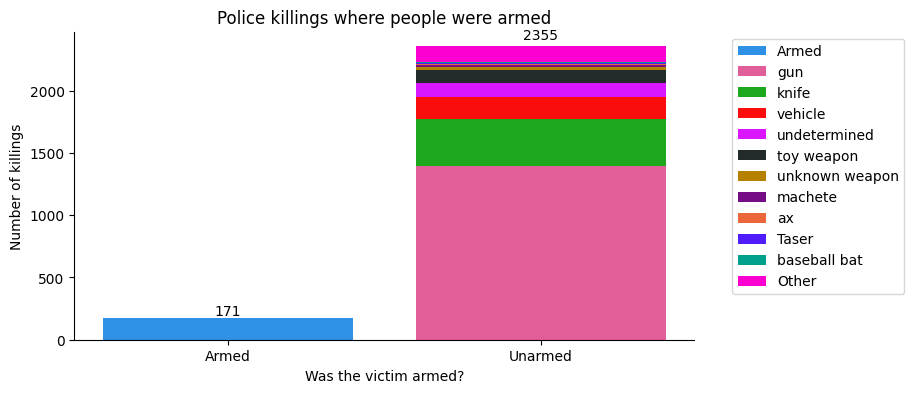

In [119]:
# Generate 67 colors using colormaps
colors = px.colors.qualitative.Dark24
fig, ax = plt.subplots(figsize=(8,4))

ax.bar('Armed', unarmed_count, color=colors[0], label='Armed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

bottom = 0
armed_bars = []
for i, (weapon_type, count) in enumerate(armed_count.items()):
  color_index = min(i+1, len(colors)-1)
  bar = ax.bar('Unarmed', count, bottom=bottom, color=colors[color_index], label=weapon_type)
  armed_bars.append(bar)
  bottom += count

ax.bar_label(ax.containers[0], fmt='%.0f')
if bottom > 0:
    ax.bar_label(armed_bars[-1], fmt='%d', padding=3)

ax.set_xlabel('Was the victim armed?')
ax.set_ylabel('Number of killings')
ax.set_title('Police killings where people were armed')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [120]:
total_fatalities = len(df_fatalities)
killed_under_25 = (df_fatalities['age']<25).sum()
percentage_under_25 = (killed_under_25/total_fatalities)*100

print(f"Percentage of people under 25 years old killed by the police: {percentage_under_25:.2f}%")

Percentage of people under 25 years old killed by the police: 17.75%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

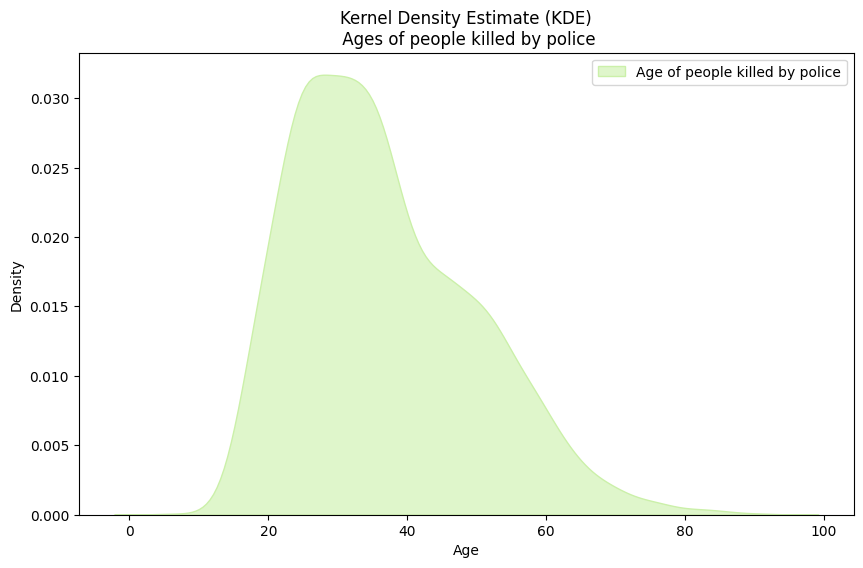

Most people killed by police are between 20-40 years old, the tendency decreases from 40 to 60.


In [121]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_fatalities, x="age", label="Age of people killed by police", fill=True, alpha=0.6, color="#CBF0A9")

plt.title("Kernel Density Estimate (KDE)\n Ages of people killed by police")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

print("Most people killed by police are between 20-40 years old, the tendency decreases from 40 to 60.")

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [122]:
df_fatalities['race_name'] = df_fatalities['race'].map(race_mapping)
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race_name
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Asian
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,White
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Hispanic
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,White
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Hispanic


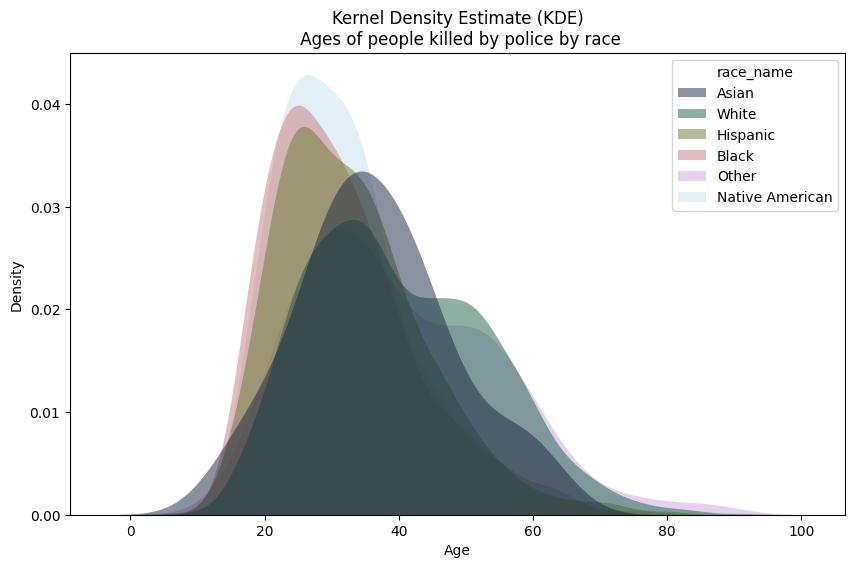

Distributions seem pretty similar between races, except for asian, most asians are killed between 30 and 50 years old.


In [123]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_fatalities,
            x="age",
            hue="race_name",
            fill=True,
            alpha=0.5,
            common_norm=False,
            palette="cubehelix",
            linewidth=0,)

plt.title("Kernel Density Estimate (KDE)\n Ages of people killed by police by race")
plt.xlabel("Age")
plt.ylabel("Density")

plt.show()

print("Distributions seem pretty similar between races, except for asian, most asians are killed between 30 and 50 years old.")

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [124]:
x = killed_by_race.index
y = killed_by_race.values

fig = go.Figure(data=[go.Bar(x=y, y=x, orientation='h')])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(title_text='Total number of people killed by race')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [125]:
killed_w_mental_illness = (df_fatalities['signs_of_mental_illness']==True).sum()
percentage_mental_illness = (killed_w_mental_illness/total_fatalities)*100

print(f"Percentage of people diagnosed with mental illness killed by the police: {percentage_mental_illness:.2f}%")

Percentage of people diagnosed with mental illness killed by the police: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [126]:
top_10_cities = df_fatalities['city'].value_counts().head(10)

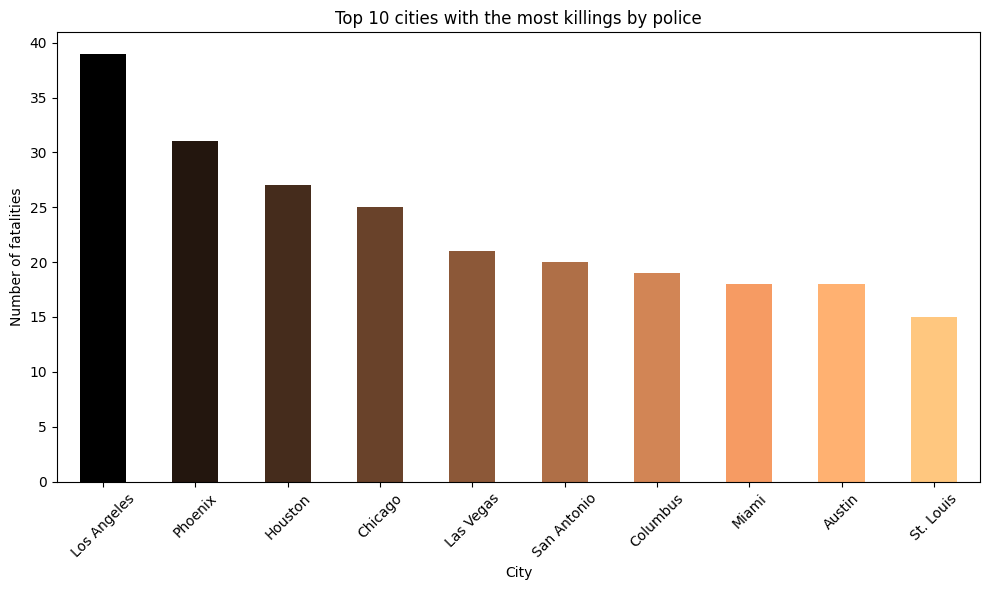

In [127]:
colors = plt.cm.copper(np.linspace(0, 1, len(top_10_cities)))

plt.figure(figsize=(10, 6))

top_10_cities.plot(kind='bar', color=colors)
plt.title('Top 10 cities with the most killings by police')
plt.xlabel('City')
plt.ylabel('Number of fatalities')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [128]:
# Top 10 cities to list in order to filter:
top_10_cities_list = top_10_cities.index.tolist()

# Filter the df by cities in the list:
df_top_10_cities = df_fatalities[df_fatalities['city'].isin(top_10_cities_list)]

# Group by race name:
df_top_10_cities_by_race = df_top_10_cities.groupby(['city','race_name']).size().reset_index(name='count')

In [129]:
colors = ['#75BD89', '#98BD75', '#BD75A0', '#3D2A35', '#2A3D2F']

fig = px.bar(df_top_10_cities_by_race,
             x="city",
             y="count",
             color="race_name",
             text="race_name",
             color_discrete_sequence=colors)
fig.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [130]:
country_count = df_fatalities.groupby('state').size().reset_index(name='count')
country_count.head()

,state,count
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424


In [131]:
fig = go.Figure(data=go.Choropleth(
    locations=country_count['state'],
    z = country_count['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Fatalilites",
))

fig.update_layout(
    title_text = 'People killed by police by US State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [136]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%d/%m/%y') # to datetime
df_fatalities['year_month'] = df_fatalities['date'].dt.to_period('M')  # extract year_month
fatalities_per_month = df_fatalities.groupby(df_fatalities['year_month']).size().reset_index(name='count') # group by
fatalities_per_month['year_month'] = fatalities_per_month['year_month'].dt.to_timestamp() # convert to time after the group by
fatalities_per_month.head()

,year_month,count
0,2015-01-01,76
1,2015-02-01,77
2,2015-03-01,92
3,2015-04-01,84
4,2015-05-01,71


In [145]:
area_trace = go.Scatter(
    x=fatalities_per_month['year_month'],
    y=fatalities_per_month['count'],
    fill="tozeroy",
    mode="lines+markers",
    name="People killed by the police in the US",
    line=dict(color="lightsteelblue"),
)

bar_trace = go.Bar(
    x=fatalities_per_month['year_month'],
    y=fatalities_per_month['count'],
    name="People killed by the police in the US",
    zorder=1,
    marker=dict(color="lightslategray"),
)

fig = go.Figure(data=[area_trace, bar_trace])

fig.update_layout(
        title='People killed by the police in the US',
        height=600,
        width=1200,
    )

fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).